# Crime and the Human Development Index

## Correlation Between Number of Cameras and Crime Rate

Even though crime prevention is the primary goal of CCTV, its efficacy is highly debatable. As seen in the graph below, an increase in the amount of CCTV per 1000 people does not correlate lower rates.

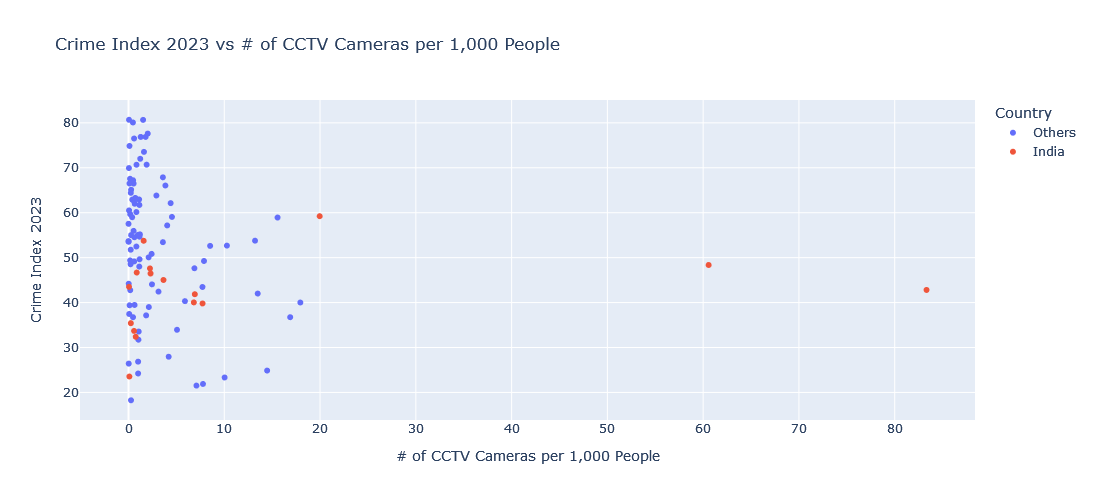

In [2]:
%run crime_vs_cctv.ipynb

To receive a clearer visualization, the global outlier China has been left out of the analysis in order to better capture the relation between the increase in cameras and safety. Even with China left out, two cities stick out above the rest in terms of number of CCTV cameras per 1000 people: Indore and Hyderablad, both located in India. However, other cities in India, colored in orange, have around the same or a lower crime rate with fewer cameras per 1000 people, indicating that even within the same country, more cameras don’t necessarily make a difference. 

A recently discovered explanation for this is that most video surveillance systems are still human-controlled, meaning that human operators watch and assess the video recordings (Ratcliffe, 2006). Meanwhile, surveillance monitoring has become more labor-intensive over the years, with the number of cameras outnumbering the monitoring screens (Elharrouss et al., 2021; Zabłocki et al., 2014). In addition, most CCTV cameras operate daily for 24 hours, making it difficult for security personnel to keep up with crime through this new technology (Zabłocki et al., 2014).

Whether CCTV works remains imprecise: it might be a way to only combat crimes of a certain type, but definitely not enough to reduce overall crime rates. A question emerging from this is whether governments should frame these surveillance technologies as a means to enhance safety as citizens might be unaware of the ineffectiveness of the technology. 


## Introducing the Human Development Index
As aforementioned, crime prevention cannot be fulfilled by the presence and/or 
increase of only surveillance cameras. In order to prevent crime, there is a sociological 
demand to dismantle the multitude of indicators predicting crime. Therefore, the following section will dive deeper into diverse demographic and socio-economic factors that predict crime rates. To achieve this, the Human Development Index (HDI) will be inspected


## Global Annual Reports of the Human Development Index

The HDI measures average achievement of three key dimensions: a long and healthy life, knowledge reproduction, and living standards. Indicators of these dimensions evolve around aspects, like life expectancy, years of schooling, and gross national income. To be clear, the higher the HDI index value, the ‘better’ you could say a country is.

As seen in the graph, there is an overall global increase over time of overall HDI-levels per country. However, human development is unequally distributed over the nations, representing global inequalities. We will delve more into what this metric means for the crime index for a country.


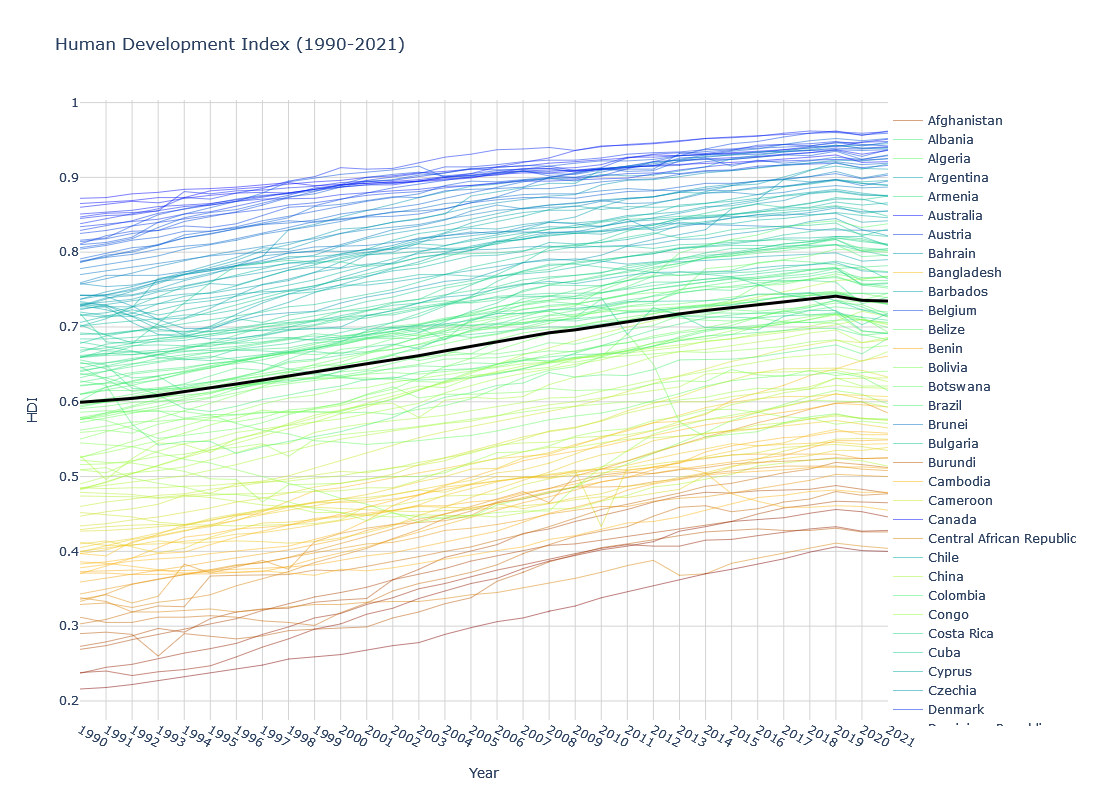

In [3]:
%run HDI.ipynb

## Analysis of Human Development Index and Crime Index

The graph below somewhat displays the correlation between the HDI index and the crime index. As you can see, both the indexes are divided into meaningful subsections. To explain those in detail, the values ‘Low’, ‘Medium’ and ‘High’ correspond to crime indices under 40, 40-60 and above 60, respectively. The HDI index is also divided into equal parts. 

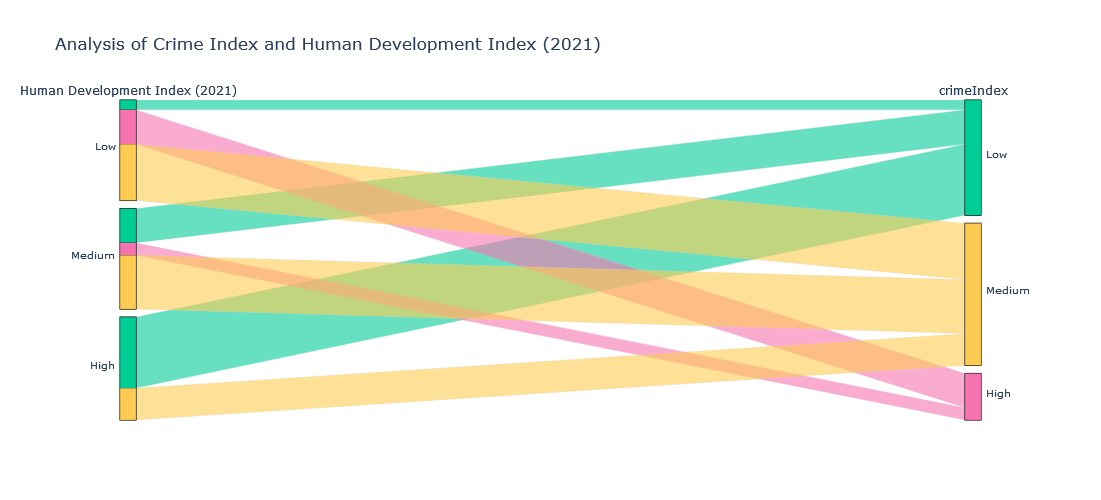

In [5]:
%run crime_hdi.ipynb

A noticeable trend emerging from this graph, is that countries with a low crime index most likely have higher rates of HDI, and high crime rates correspond with a lower HDI. So for example, the countries with relatively low HDI index in the previous figure would here primarily correspond to the ‘High’ section of crime index.

This shows how structural and demographic dimensions can be assessed as predictors of the opportunity to commit crime. Further, assessing these international trends in structural predictors forward the importance of crime perceptions as a global issue in addition to a localized issue.


## A Cross-National Comparison of Crime and the Human Development Index

Below is shown a heatmap of standardized indicators of HDI that are higher or lower compared to the countries. On the x-axis, ten countries are put into perspective: the 5 most left indicating the countries with the lowest crime index, and the 5 most right indicating the countries with the highest crime index.

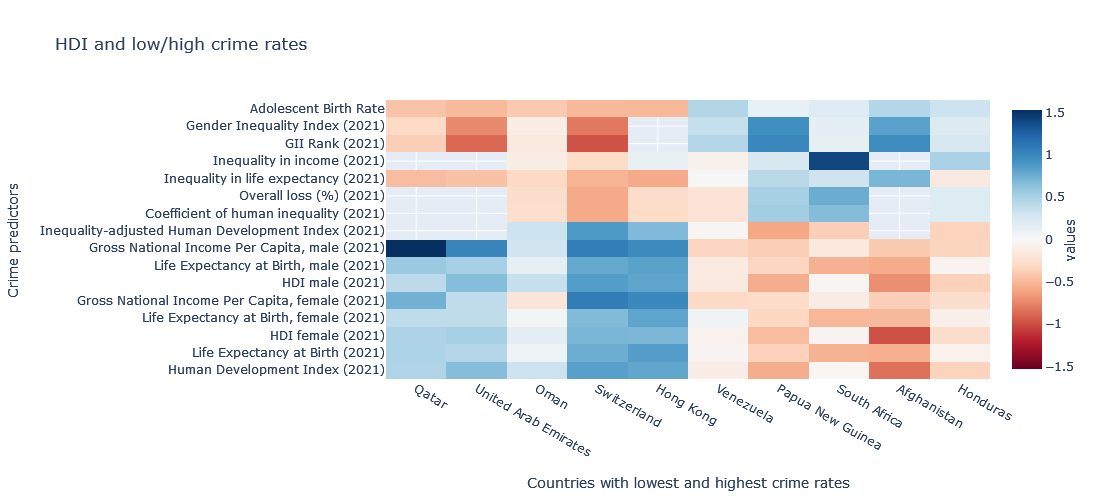

In [7]:
%run heatmap.ipynb

The clear color-coordination of this map visualizes how countries with lower crime rates score higher on overall gross national income per capita, gross national income for females, gross national income for males, overall life expectancy at birth, life expectancy for males, and life expectancy for females. Lower crime rates also correlate with lower values of inequality of human development, overall loss,  inequality of life expectancy, income inequality, gender inequality, and adolescent birth rates of women aged 15-19.

Some of these points can be explained by the fact that a much higher or a much lower score on this index is a result of poverty, which can be a cause for crime. For example, A low life expectancy is most likely the cause of insufficient access to healthcare. If someone doesn’t have sufficient funds for healthcare, it is likely they do not have money for other basic needs either, and are forced to perform illegal activities.

These cross-national patterns of crime rate prediction show how combating these structural issues might help combat crime. This implies how the prevention of illegal activity cannot be encountered by surveillance technologies only, as the pressure of unfortunate demographic dimensions outweigh the potential risk one might take for getting caught.

## Analysis of Legal Enforcement and Crime

To further understand crime rates in relation to the human development index, there is a need to consider whether every country reacts upon crime the same way. This consideration is illustrated by the Rule of Law metric, which encapsulates the question whether all laws are transparently, independently, impartially and equally enforced.

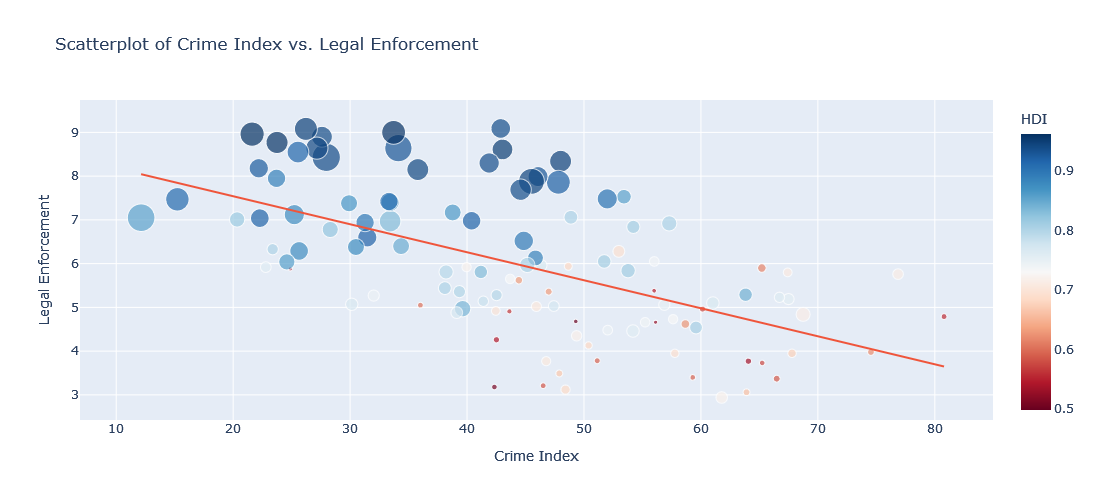

In [8]:
%run law_enforcement.ipynb

The above graph shows how higher scores on the Human Development Index correspond with fairer law enforcement. These high enforcement rates imply the fact that crime is more likely to be acted upon, since it’s less likely that law enforcement is corrupt. Interestingly, the countries that score high on both measures are more likely to have higher rates of national income - as indicated by the size of the bubbles in the plot. It is likely that countries with a high national income have more money to provide basic needs for its citizens, including better law enforcement. 